In [2]:
import nrlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]
import os
os.getpid()

8880

# Verification that the code works

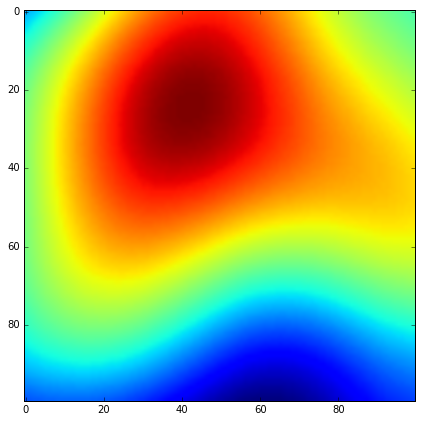

In [7]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 1000.0)
f1 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0),
).reshape((100, 100), order='F')

plt.imshow(f1)

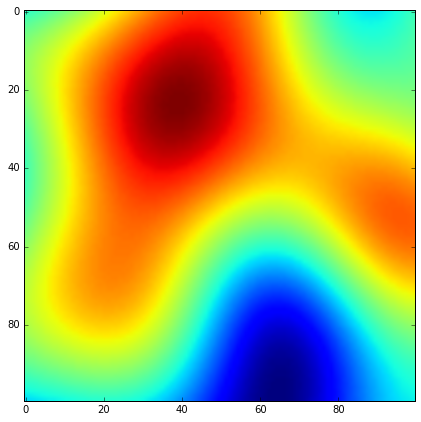

In [8]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 1000.0)
f1 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, sx=0.05, sy=0.05),
).reshape((100, 100), order='F')

plt.imshow(f1)

# A Case That Breaks

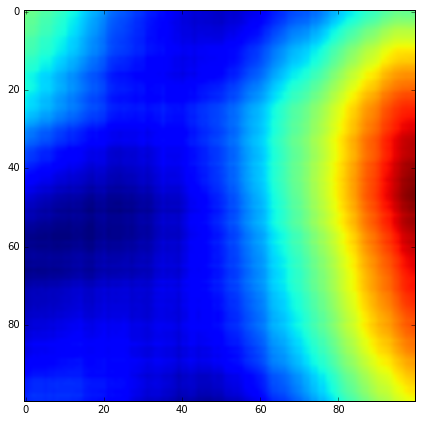

In [3]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 1000.0)
f3 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=200, pady=200),
).reshape((100, 100), order='F')

plt.imshow(f3)

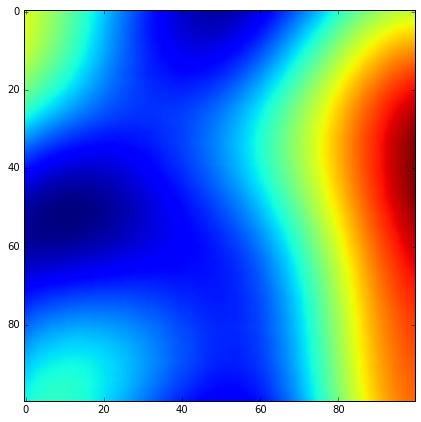

In [4]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 1000.0)
f4 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=200, pady=200, sx=0.15, sy=0.15),
).reshape((100, 100), order='F')

plt.imshow(f4)

### single direction smoothing

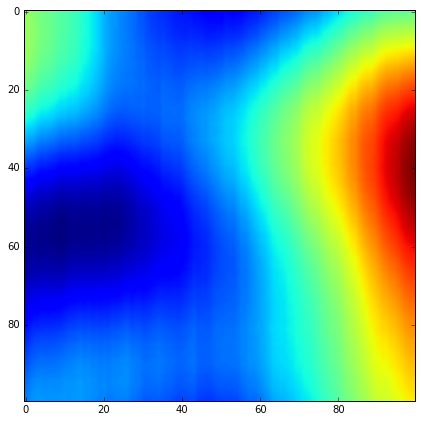

In [5]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 1000.0)
f5 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=200, pady=200, sx=0.15),
).reshape((100, 100), order='F')

plt.imshow(f5)

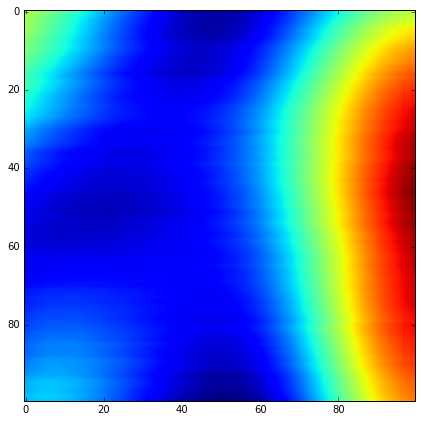

In [6]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 1000.0)
f5 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=200, pady=200, sy=0.15),
).reshape((100, 100), order='F')

plt.imshow(f5)

## So far...

The smoothing can have the desired effect (reduce necessary padding), but the question is at what cost? Moreover, is the implementation correct when introducing anisotropy:

Hence, the following are stated as questions to be answered
- Does it have the desired effect for other variograms?
- Does it work as intended for anisotropy?

# Testing Anisotropy

### Different direction; different smoothing

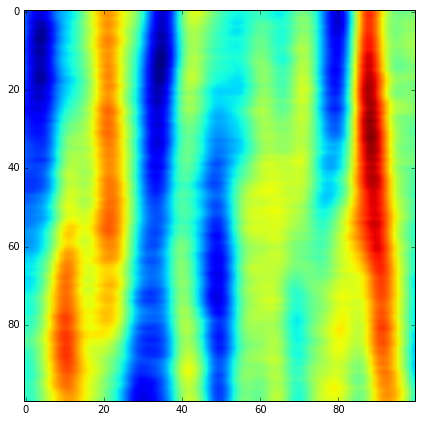

In [29]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 100.0)
f6 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=100, pady=10),
).reshape((100, 100), order='F')

plt.imshow(f6)

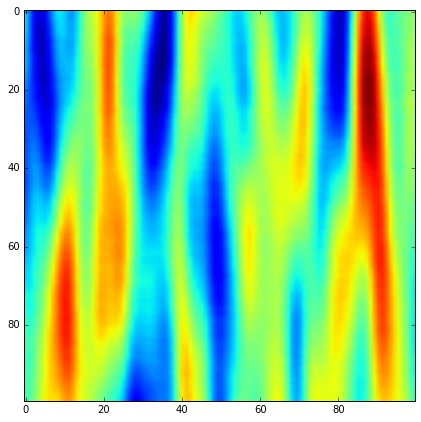

In [30]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 100.0)
f7 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=100, pady=10, sx=0.05, sy=0.05),
).reshape((100, 100), order='F')

plt.imshow(f7)

Above, grid size and padding is $2 \cdot range$. This is known to be insufficient for a Gaussian variogram. Applying smoothing in both directions helps, but the striping effect is still there.

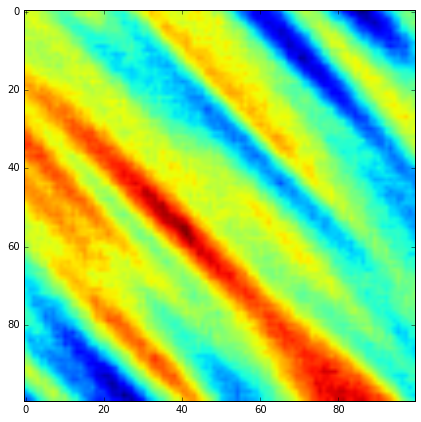

In [20]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 100.0, azimuth=45.0)
f6 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=100, pady=100),
).reshape((100, 100), order='F')

plt.imshow(f6)

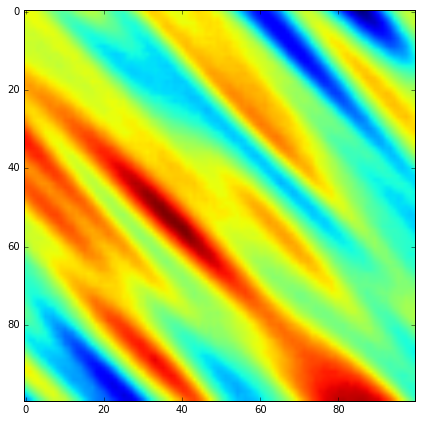

In [21]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 100.0, azimuth=45.0)
f6 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=100, pady=100, sx=0.5, sy=0.5),
).reshape((100, 100), order='F')

plt.imshow(f6)

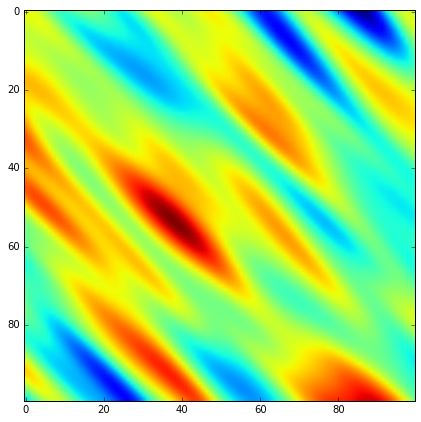

In [22]:
nrlib.seed(123)
v = nrlib.variogram('gaussian', 1000.0, 100.0, azimuth=45.0)
f6 = np.array(
    nrlib.advanced.simulate(v, 100, 10.0, 100, 10.0, padx=100, pady=100, sx=0.05, sy=0.05),
).reshape((100, 100), order='F')

plt.imshow(f6)